In [18]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
(train_images , train_labels) , (test_images , test_labels) = mnist.load_data()

In [4]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [5]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


5

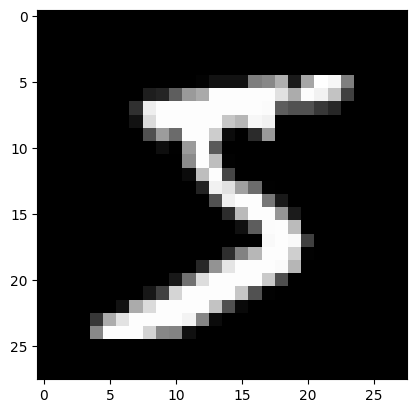

In [6]:
first_img = train_images[0]
plt.imshow(first_img , cmap= 'gray') # viewing the image
train_labels[0] # labes of the image is 5

In [7]:
train_images = train_images.reshape((60000,28,28,1))
# 1 is the depth for B&W (black and white) , for RGB it is 3
train_images.shape

(60000, 28, 28, 1)

In [8]:
# scaling
train_images = train_images.astype('float32')/255

In [9]:
# test image reshaping
test_images = test_images.reshape(10000 , 28 ,28 ,1)
test_images.shape
test_images = test_images.astype('float32')/255

In [10]:
# convert to categorical
train_labels = to_categorical(train_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
test_labels = to_categorical(test_labels)
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
len(train_labels[50000])

10

## Model Architecture

In [13]:
# neural network architecture for adaptive activation function (AF) selection

initializer0 = keras.initializers.RandomUniform(minval = -0.01, maxval =0.1)
initializer1 = keras.initializers.RandomUniform(minval = -0.01, maxval =0.1)
initializer2 = keras.initializers.RandomUniform(minval = 0.5, maxval =1.5)

class Ada_act(keras.layers.Layer):
    def __init__(self):
        super(Ada_act, self).__init__()
        self.k0 = self.add_weight(name='k0', shape = (), initializer=initializer0, trainable=True)
        self.k1 = self.add_weight(name='k1', shape = (), initializer=initializer1, trainable=True)
        self.k2 = self.add_weight(name='k2', shape = (), initializer=initializer2, trainable=True)
        
    def call(self, inputs):
        return self.k0 + tf.multiply(inputs, self.k1) + tf.multiply(tf.multiply(inputs,inputs), self.k2)

In [19]:
# Build a model
act = Ada_act()
model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3) ,activation=act, input_shape = (28 ,28 ,1)))
model.add(layers.Flatten())
model.add(layers.Dense(64 , activation=act))
model.add(layers.Dense(10 , activation='softmax'))

In [20]:
# compling the model

model.compile(optimizer='rmsprop' , loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        323       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 64)                1384515   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,385,485
Trainable params: 1,385,485
Non-trainable params: 0
_________________________________________________________________


In [22]:
# feeding the data in the model
history = model.fit(train_images,train_labels , epochs= 5 , batch_size = 100 , 
                    validation_data=(test_images , test_labels))

Epoch 1/5
600/600 [==============================] - 53s 86ms/step - loss: 0.7438 - accuracy: 0.8989 - val_loss: 0.0646 - val_accuracy: 0.9794
Epoch 2/5
600/600 [==============================] - 53s 89ms/step - loss: 0.0455 - accuracy: 0.9871 - val_loss: 0.0467 - val_accuracy: 0.9863
Epoch 3/5
600/600 [==============================] - 51s 85ms/step - loss: 0.0214 - accuracy: 0.9938 - val_loss: 0.0518 - val_accuracy: 0.9853
Epoch 4/5
600/600 [==============================] - 49s 82ms/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0562 - val_accuracy: 0.9862
Epoch 5/5
600/600 [==============================] - 54s 90ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.0846 - val_accuracy: 0.9864


In [23]:
# Optimal Values of k0,k1&k2
print("AF coefficients (weights) {}".format(act.get_weights()))

AF coefficients (weights) [-0.012733989, 0.1626034, 1.4863855]


In [24]:
from sklearn.metrics import f1_score
# training and test loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
print(train_loss[-1])

0.006744380574673414


In [26]:
# training and testing accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

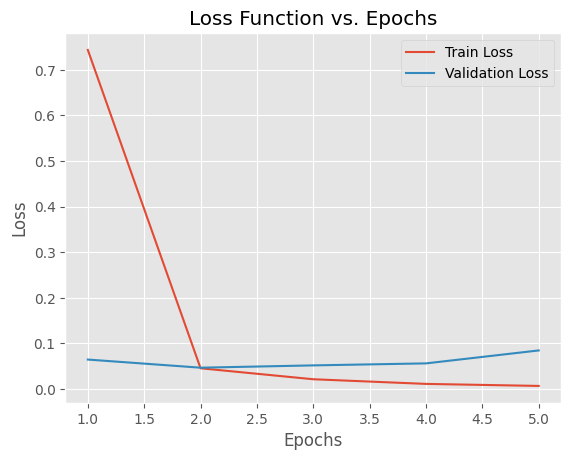

In [29]:
plt.style.use('ggplot')
epochs = 5
# Plot of loss function vs. epochs
plt.plot(range(1, epochs + 1), train_loss, label='Train Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function vs. Epochs')
plt.legend()
plt.show()